# PCA tutorial


author: Emile Esmaili (ede2110@columbia.edu)

## 1. The Math 🤓

###  Rationale

When we have a matrix $X$ of $n$ observations and $p$ features, we can think of it as a set of $n$ points in a $p$-dimensional space.

We can use matrices to **project** vectors from one vector space to another. For example, we can project a vector from a $p$-dimensional space to a $q$-dimensional space, where $q < p$.

Take matrix A, which is $n \times p$ and matrix B, which is $p \times q$. The product of these matrices is a matrix C, which is $n \times q$.

With **PCA** we are interested in finding the matrix B, which will project the data from a $p$-dimensional space to a $q$-dimensional space, where $q < p$, while **preserving as much of the variance in the data** as possible.

So basically if we have a matrix of features $X$ with 500 columns, PCA can give us a matrix of features $X'$ with 50 columns, which will explain most of the variance in the data. It will be the **'best' low dimensional** representation of the data.

###  Derivation 🧪

- $X$ is our data matrix. Assume $x$ has covariance matrix S, ie Var($X$) = $S$.
- Let $u$ be the **projection matrix** we are looking for, whose columns are $u_i$. Assume that $u_i$ is a unit vector, i.e. $u_i^T u_i = 1$.
- !Reminder from multivariate stats: X is a matrix, a is a vector. Then if $Var(X)=S$, then $Var(a^TX)=a^TSa$

We start with the first column of the projection matrix, ie $u_1$. We want to find the vector $u_1$ that maximizes the variance of the projected data $u_1^Tx$.
Our problem is formulated as follows:

*Maximize*:    Var($u_1^TX$) = $u_1^TSu_1$ 


*subject to*:   $u_1^Tu_1 = 1$

Now let's use Lagrange multipliers to solve this problem. We want the projection vector $u_1$ that maximizes the Variance function, while satisfying the constraint that $u_1$ is a unit vector.

We want to maximize   $ u_1^TSu_1 - \lambda(u_1^Tu_1 - 1)$

We take the derivative with respect to $u$ and set it to zero:

$$
2Su_1 - 2\lambda u_1 = 0 \iff Su_1 = \lambda u_1
$$

We recognize the very definition of eigenvalues and eigenvectors of a matrix, ie $u_1$ is an eigenvector of $S$ and $\lambda$ is the corresponding eigenvalue.




So the first column of the projection matrix $u_1$ is the eigenvector of $S$ with the largest eigenvalue $\lambda_1$... and so on for the other columns of the projection matrix.

**PCA is therefore equivalent to finding the eigenvectors of the covariance matrix of the data.**

### Using PCA as a dimensionality reduction technique

To get the lower dimensional representation of the data, we simply project the data onto the projection matrix $u$. So if we want to project the data onto the first $k$ principal components, we simply multiply the data matrix $X$ by the first $k$ columns of the projection matrix $u$. ie $X' = X\cdot u_k$.

We call every column $u_k$ the scores of the data on the $k_{th}$ principal component. The 'scores' are another name for the eigenvalues. The principal components are the columns of $X'$. You get the Principal Components by multiplying the data matrix $X$ by the scores/eigenvalues $u_k$.

### Using PCA to reconstruct the data

We can also use PCA to reconstruct the data. If we have a lower dimensional representation of the data $X'$, we can reconstruct the original data $X$ by multiplying $X'$ by the transpose of the projection matrix $u_k^T$. ie $X = X'\cdot u_k^T$. The is the same as projecting the data onto the first $k$ principal components and then projecting it back to the original space. The is called the inverse transform



## Properties of Principal Components (PCs)
- A powerful property of the Principal Components (PCs) is that they are **uncorrelated**, because remember from linear Algebra: The eigenvectors form a **basis**. They are **linearly independent**

- This is useful is you want to do regression, because you can use the PCs as predictors and you don't have to worry about multicollinearity. It's called **Principal Component Regression**

- One caveat is the the principal components have no *a priori* meaning, or interpretation. It is for you to figure out what they mean by looking the the loadings/eigenvalues which can be viewed as the weights assigned to every variable for each PC. ie, the first column is the weights for every variable to build the first PC, the second column is the weights for every variable to build the second PC, etc.



## 2. The code 👩‍💻

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA


In [61]:
k = 10 # principal components

### A. with sklearn (baby wheels)

In [62]:
digits = datasets.load_digits()
X = digits.data
print('data has shape', X.shape)

data has shape (1797, 64)


In [63]:
# do PCA with sklearn, 2 components
pca = PCA(n_components=k)
pca.fit(X)
X_pca = pca.transform(X)
print('transformed data has shape', X_pca.shape)

transformed data has shape (1797, 10)


In [64]:
# get the explained variance ratio
print(pca.explained_variance_ratio_)
print('sum of explained variance ratio:', sum(pca.explained_variance_ratio_))

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315985 0.03661362 0.03353236 0.03078778]
sum of explained variance ratio: 0.7382262406317281


This means, the first Principal Component explains 14.9% of the variance in the data, the second explains 13.6% and so on

In [65]:
X_inverse = pca.inverse_transform(X_pca)
print('inverse transformed data has shape', X_inverse.shape)

inverse transformed data has shape (1797, 64)


### B. Now we will implement PCA from scratch using numpy (no baby wheels)


#### Fit the PCA

In [66]:
# center the data matrix
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean
# compute covariance matrix as X_centered^T.X_centered / n-1
cov = X_centered.T.dot(X_centered) / (X.shape[0]-1)

# get eignenvalues and eigenvectors of the covariance matrix
vals, U = np.linalg.eig(cov) 

#### Transform the data to the new space by projecting X onto the first k principal components with U

In [67]:
X_pca2 = X_centered.dot(U[:, :k]) #k components
print('transformed data has shape', X_pca2.shape)

transformed data has shape (1797, 10)


In [68]:
# get the explained variance ratio
print(vals[:k]/np.sum(vals))
print('sum of explained variance ratio:', sum(vals[:k]/np.sum(vals)))

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806]
sum of explained variance ratio: 0.7382267688459532


#### Reconstruct the data

In [69]:
X_inverse2 = X_pca2.dot(U.T[:k, :]) + X_mean # add the mean cause we substracted it intially
print('inverse transformed data has shape', X_inverse.shape)

inverse transformed data has shape (1797, 64)


#### The PCs are decorrelated

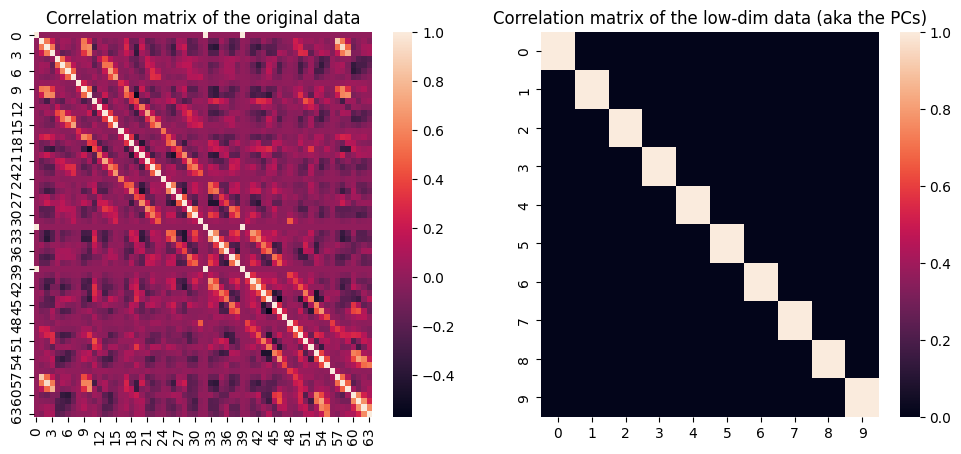

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a 1x2 grid of subplots

# Create heatmaps using Seaborn
sns.heatmap(np.corrcoef(X+1e-15, rowvar=False), ax=ax[0])
sns.heatmap(np.corrcoef(X_pca2, rowvar=False), ax=ax[1])

ax[0].set_title("Correlation matrix of the original data")
ax[1].set_title("Correlation matrix of the low-dim data (aka the PCs)")

plt.show()



#### A plot to illustrate the power of PCA for image reconstruction

Text(0.5, 1.0, 'Reconstructed Image')

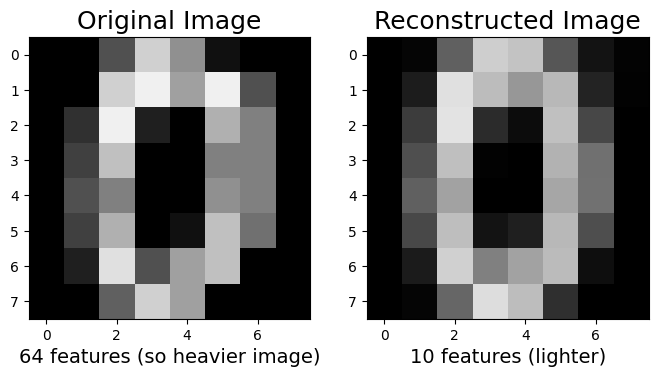

In [73]:

plt.figure(figsize=(8,4))
# Original Image
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8,8),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 16))
plt.xlabel('64 features (so heavier image)', fontsize = 14)
plt.title('Original Image', fontsize = 18)
# PCA reconstruction
plt.subplot(1, 2, 2)
plt.imshow(X_inverse2[0].reshape(8, 8),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 16))
plt.xlabel('10 features (lighter)', fontsize = 14)
plt.title('Reconstructed Image', fontsize = 18)
